In [2]:
# !pip install wordcloud
# !pip install konlpy

In [9]:
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession

In [4]:
# SparkSession 만들기
spark = SparkSession.builder.appName('Play with pyspark ML on Titanic data').getOrCreate()

In [5]:
# 데이터 로드
df = spark.read.csv('./관광리뷰.csv', header=True, inferSchema=True)

# toPandas()로 판다스 객체로 변환
tmpDf = df.limit(10).toPandas()

In [7]:
# 형태소 분석
okt = Okt()
text = " ".join(tmpDf['리뷰'])
nouns = okt.nouns(text) # 명사만 추출

# words에서 단어별 빈도수를 구함
words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외
c = Counter(words)

In [8]:
c

Counter({'수영장': 2,
         '객실': 2,
         '걱정': 1,
         '아이': 2,
         '무조건': 1,
         '청결': 1,
         '호텔': 1,
         '냄새': 1,
         '편의점': 3,
         '수제': 1,
         '맥주': 1,
         '바로': 2,
         '기와': 1,
         '전쟁': 1,
         '이글': 2,
         '바다': 2,
         '펜션': 1,
         '아기': 1,
         '동물농장': 1,
         '여행': 1,
         '장님': 1,
         '가격': 1,
         '대비': 1,
         '뒤쪽': 1,
         '풍경': 1,
         '더욱': 1,
         '제주도': 1,
         '구름': 1,
         '정리': 2,
         '사장': 2,
         '개별': 1,
         '바베큐': 1,
         '베란다': 1,
         '숯불': 1,
         '해먹': 1,
         '그게': 1,
         '대여': 1,
         '여비': 1,
         '이조': 1,
         '구매': 1})

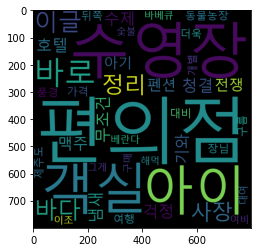

In [10]:
wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)

In [11]:
# !pip install transformers

In [18]:
!pip install tensorflow

In [21]:
!pip install pytorch

  Using cached pytorch-1.0.2.tar.gz (689 bytes)
  Running setup.py clean for pytorch
Failed to build pytorch
    Running setup.py install for pytorch: started
    Running setup.py install for pytorch: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\SOP\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\SOP\\AppData\\Local\\Temp\\pip-install-x8n93iuv\\pytorch_27d424360aea40188507fb5218743a6f\\setup.py'"'"'; __file__='"'"'C:\\Users\\SOP\\AppData\\Local\\Temp\\pip-install-x8n93iuv\\pytorch_27d424360aea40188507fb5218743a6f\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\SOP\AppData\Local\Temp\pip-wheel-leowxg42'
       cwd: C:\Users\SOP\AppData\Local\Temp\pip-install-x8n93iuv\pytorch_27d424360aea40188507fb5218743a6f\
  Complete output (5 lines):
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "C:\Users\SOP\AppData\Local\Temp\pip-i

In [16]:
from transformers import pipeline

In [23]:
classifier = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


RuntimeError: At least one of TensorFlow 2.0 or PyTorch should be installed. To install TensorFlow 2.0, read the instructions at https://www.tensorflow.org/install/ To install PyTorch, read the instructions at https://pytorch.org/.

In [20]:
classifier('I am glad to hear that you finally made it')

NameError: name 'classifier' is not defined

In [22]:
model='monologg/koelectra-small-finetuned-nsmc'